<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-12-05 15:31:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-12-05 15:31:29 (83.1 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
#df.head()
df.head()



,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

#df.head()
df[:50]

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



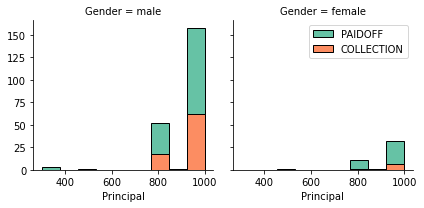

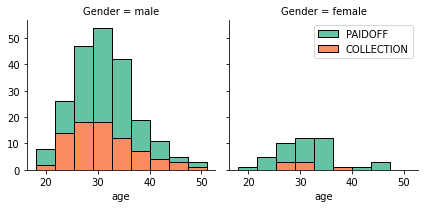

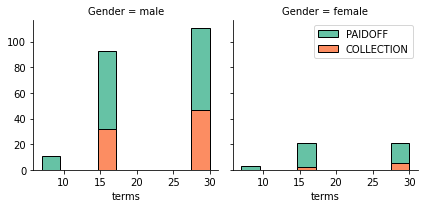

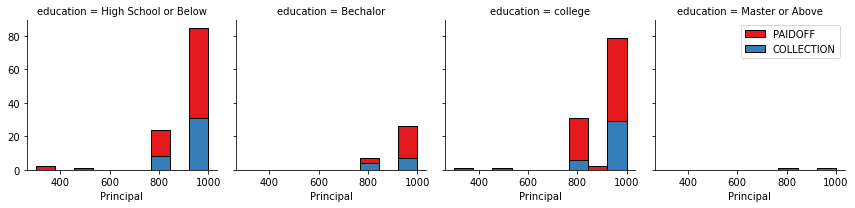

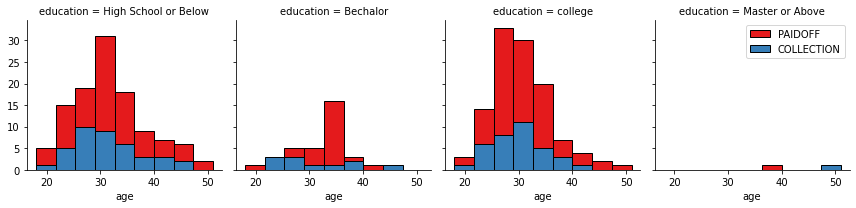

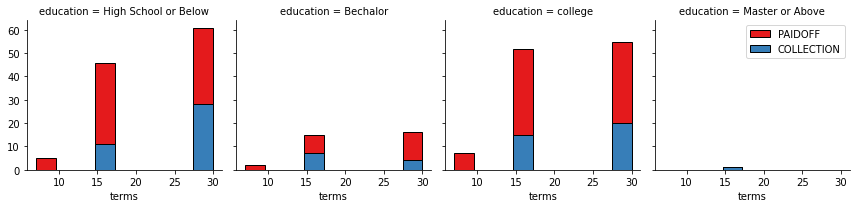

In [8]:
import seaborn as sns


###########Visualize attribute loan_status while differentiating between male and female##########

#Plotting first row of histograms

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()



#Plotting second row of histograms

bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()



#Plotting third row of histograms

bins = np.linspace(df.terms.min(), df.terms.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'terms', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()



###########Visualize attribute loan_status while differentiating between high school or lower, bachelor, college and master or above##########

#Plotting fourth row of histograms

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="education", hue="loan_status", palette="Set1", col_wrap=4)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()



#Plotting fifth row of histograms

bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="education", hue="loan_status", palette="Set1", col_wrap=4)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()



#Plotting sixth row of histograms

bins = np.linspace(df.terms.min(), df.terms.max(), 10)
g = sns.FacetGrid(df, col="education", hue="loan_status", palette="Set1", col_wrap=4)
g.map(plt.hist, 'terms', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()



We see that higher percentage of male people has still to pay off in comparison to female people

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


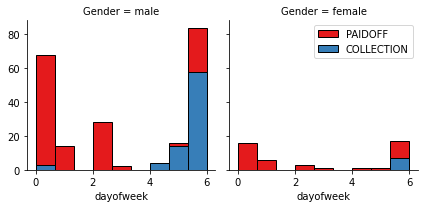

In [9]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [10]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [11]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [12]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


Let's convert PAIDOFF to 0 and COLLECTION to 1

In [13]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              0.750000
                      1              0.250000
High School or Below  0              0.741722
                      1              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               0              0.765101
                      1              0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [17]:
Feature.dtypes

Principal               int64
terms                   int64
age                     int64
Gender                  int64
weekend                 int64
Bechalor                uint8
High School or Below    uint8
college                 uint8
dtype: object

In [18]:
Feature['Bechalor'] = Feature['Bechalor'].astype('int')
Feature['High School or Below'] = Feature['High School or Below'].astype('int')
Feature['college'] = Feature['college'].astype('int')
Feature.dtypes

Principal               int64
terms                   int64
age                     int64
Gender                  int64
weekend                 int64
Bechalor                int64
High School or Below    int64
college                 int64
dtype: object

### Feature Selection


Let's define feature sets, X:


In [19]:
X = Feature
X[0:5]


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [20]:
y = df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


# Train Test Split

Split the dataset in train and test set. 80% of dataset rows are used for training, 20% of dataset rows are used for testing(test_size=0.2). random_state can be set to none which will produce different training and test sets each time the data is split, I use an integer to produce each run (even though running 30 times) the same results. 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=30)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


Import KNeighborsClassifier from scikitlearn library.
Import metrics from scikitlearn library.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Training, test set predication and accuracy calculation for different values of k

Training and accuracy calculation for different values of K allows us to select the best k-value for the final model. I will generate models with k ranging from 1 to 20. For each of the 20 models the accuracy score is calculated. The function accuracy_score is equal to jaccard_similarity_score. (When generating 100 models with k values 1 to 100, the accuracy plot shows the highest accuracy is reached somewhere between k value 0 and 20).

In [24]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

#Train 20 models with k ranging from 1 to 20

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.68571429, 0.8       , 0.81428571, 0.84285714, 0.82857143,
       0.84285714, 0.87142857, 0.85714286, 0.88571429, 0.87142857,
       0.84285714, 0.87142857, 0.87142857, 0.85714286, 0.84285714,
       0.85714286, 0.81428571, 0.87142857, 0.87142857])

Plot the model accuracy for 20 different models with neighbor value ranging from 1 to 20

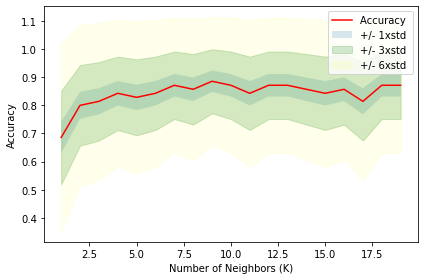

In [25]:
plt.plot(range(1,Ks),mean_acc, 'r')
plt.fill_between(range(1,Ks), mean_acc -1 * std_acc,mean_acc + 1 * std_acc, alpha=0.18)
plt.fill_between(range(1,Ks), mean_acc -3 * std_acc,mean_acc + 3 * std_acc, alpha=0.18, color="green")
plt.fill_between(range(1,Ks), mean_acc -6 * std_acc,mean_acc + 6 * std_acc, alpha=0.08, color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd' , '+/- 3xstd' , '+/- 6xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

The model with K value 9 is the most accurate with a jaccard similarity coefficient of 0.8857


# Best KNN Classification model selection with K=9 

In [26]:
k = 9


#Train Model and Predict

neigh_best = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh_best

#Predict on the test set

yhat_best = neigh_best.predict(X_test)
yhat_best[0:5]

#Accuracy evaluation

print("KNN model accuracy: ", metrics.accuracy_score(y_test, yhat_best))
print("KNN model jaccard_score: ", metrics.jaccard_score(y_test, yhat_best, pos_label=0))
print("KNN model f1_score: ", metrics.f1_score(y_test, yhat_best, average='weighted'))

KNN model accuracy:  0.8857142857142857
KNN model jaccard_score:  0.8769230769230769
KNN model f1_score:  0.8803018475149623


# Final KNN classification model trained with all the data 

In [27]:
neigh_final = KNeighborsClassifier(n_neighbors = 9).fit(X,y)

# Decision Tree


# Features and classification target selection

The feature matrix is visualized, we will use the values X to split in train and test matrix

In [28]:
X = Feature.values

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]




array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

The numerical values of the target (loan_status) to predict are shown.

In [29]:
y = df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

# Train test split

We will split our data in a train and test set. 30% of rows are for testing, 70% for training. We use the value matrixes X and y to do so, the splitted matrices are X_train, X_test, y_train and y_test.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=30)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


# Training, test set prediction and jaccard score calculations for different depth values

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
Md = 20
acc_j = np.zeros((Md-1))

#Train 20 models with max_depth(Md) ranging from 1 to 20

for n in range(1,Md):

    #Train Model and Predict
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    predTree=loanTree.predict(X_test)
    acc_j[n-1] = metrics.jaccard_score(y_test, predTree, pos_label=0)

acc_j

array([0.81730769, 0.81730769, 0.81730769, 0.71428571, 0.75247525,
       0.64646465, 0.74257426, 0.68367347, 0.71      , 0.70212766,
       0.71      , 0.68041237, 0.72164948, 0.65306122, 0.65306122,
       0.66326531, 0.65306122, 0.66326531, 0.66326531])

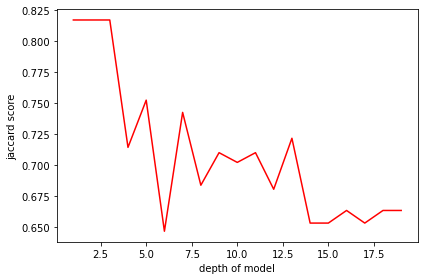

In [33]:
plt.plot(range(1,Md),acc_j, 'r')
plt.ylabel('jaccard score')
plt.xlabel('depth of model')
plt.tight_layout()
plt.show()

# Training, test set predication and F1 score calculations for different depth values

In [34]:
Md = 20
acc_f1 = np.zeros((Md-1))

#Train 20 models with max_depth(Md) ranging from 1 to 20

for n in range(1,Md):

    #Train Model and Predict
    loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    predTree=loanTree.predict(X_test)
    acc_f1[n-1] = metrics.f1_score(y_test, predTree, average="weighted")

acc_f1

array([0.73514449, 0.73514449, 0.73514449, 0.7724359 , 0.73722855,
       0.67539948, 0.73722855, 0.71473681, 0.71153846, 0.74280728,
       0.72485589, 0.71870641, 0.74755086, 0.69343284, 0.70055844,
       0.70055844, 0.69343284, 0.69343284, 0.69343284])

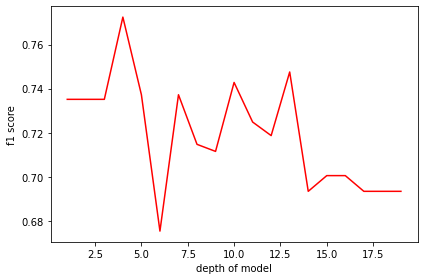

In [35]:
plt.plot(range(1,Md),acc_f1, 'r')
plt.ylabel('f1 score')
plt.xlabel('depth of model')
plt.tight_layout()
plt.show()

I make an average of jaccard score and f1 score for best model selection. 

In [36]:
Z = (acc_j + acc_f1)/2
Z


array([0.77622609, 0.77622609, 0.77622609, 0.74336081, 0.7448519 ,
       0.66093206, 0.73990141, 0.69920514, 0.71076923, 0.72246747,
       0.71742795, 0.69955939, 0.73460017, 0.67324703, 0.67680983,
       0.68191187, 0.67324703, 0.67834907, 0.67834907])

In [37]:
max(Z)

0.7762260887260888

# Best Decision Tree model selection with Max depth 3

We Create an instance of the DecisionTreeClassifier called loanTree

In [38]:
loanTree_best = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
loanTree_best


DecisionTreeClassifier(criterion='entropy', max_depth=3)

We will create the decisiontree model using the fit function from the DecisionTreeClassifier. Next we use the model to predict the target values from the test feature matrix and name this target value array predTree. We print the 5 first elements of the predicted values by the model and the actual values (y_test). These arrays will be compared to eachother to calculate the accuracy çf the model. The metrices, jaccard similarity index and F1 score will be used to do so. 

In [39]:
loanTree_best.fit(X_train,y_train)
predTree_best = loanTree_best.predict(X_test)

print (predTree_best [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[0 0 0 0 0]


# Evaluation of final Decision Tree model with Max depth 3 

In [40]:
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_test, predTree_best, normalize=True))
print("DecisionTree's jaccard_score: ", metrics.jaccard_score(y_test, predTree_best, pos_label=0))
print("DecisionTree's f1_score: ", metrics.f1_score(y_test, predTree_best, average='weighted'))

DecisionTree's Accuracy:  0.8173076923076923
DecisionTree's jaccard_score:  0.8173076923076923
DecisionTree's f1_score:  0.7351444851444852


# Final decision tree model trained with all data

In [41]:
loanTree_final = DecisionTreeClassifier(criterion="entropy", max_depth = 3).fit(X,y)

# Support Vector Machine


# Visualizing non-linearity in dataset

In [42]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1
5,7,7,0,1000,30,2016-09-09,2016-10-08,36,college,0,4,1
6,8,8,0,1000,30,2016-09-09,2016-10-08,28,college,0,4,1
7,9,9,0,800,15,2016-09-10,2016-09-24,26,college,0,5,1
8,10,10,0,300,7,2016-09-10,2016-09-16,29,college,0,5,1
9,11,11,0,1000,15,2016-09-10,2016-10-09,39,High School or Below,0,5,1


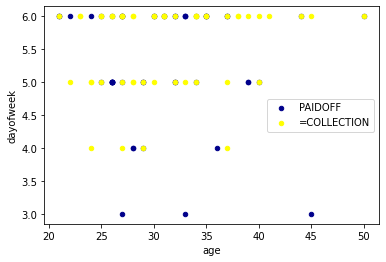

In [43]:
ax = df[df['loan_status'] == 0][0:50].plot(kind='scatter', x='age', y='dayofweek', color='DarkBlue', label='PAIDOFF');
df[df['loan_status'] == 1][0:50].plot(kind='scatter', x='age', y='dayofweek', color='Yellow', label='=COLLECTION', ax=ax);
plt.show()

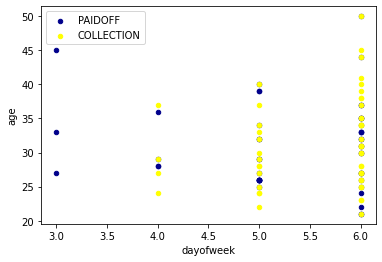

In [44]:
ax = df[df['loan_status'] == 0][0:50].plot(kind='scatter', x='dayofweek', y='age', color='DarkBlue', label='PAIDOFF');
df[df['loan_status'] == 1][0:50].plot(kind='scatter', x='dayofweek', y='age', color='Yellow', label='COLLECTION', ax=ax);
plt.show()

# Feature selection 

In [45]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [46]:
df['education'].replace(to_replace=['High School or Below','Bechalor','college','Master or Above'], value=[0,1,2,4],inplace=True)
df.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,0,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,1,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,2,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,2,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,2,0,4,1
5,7,7,0,1000,30,2016-09-09,2016-10-08,36,2,0,4,1
6,8,8,0,1000,30,2016-09-09,2016-10-08,28,2,0,4,1
7,9,9,0,800,15,2016-09-10,2016-09-24,26,2,0,5,1
8,10,10,0,300,7,2016-09-10,2016-09-16,29,2,0,5,1
9,11,11,0,1000,15,2016-09-10,2016-10-09,39,0,0,5,1


In [47]:
feature_SVM = df[['Principal', 'terms', 'education', 'age' , 'Gender' , 'dayofweek', 'weekend']]
X = np.asarray(feature_SVM)

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769, -1.05523215,  2.33152555, -0.42056004,
        -0.26122054, -1.20577805],
       [ 0.51578458,  0.92071769, -0.0120598 ,  0.34170148,  2.37778177,
        -0.26122054, -1.20577805],
       [ 0.51578458, -0.95911111,  1.03111256, -0.65321055, -0.42056004,
        -0.26122054, -1.20577805],
       [ 0.51578458,  0.92071769,  1.03111256, -0.48739188,  2.37778177,
         0.12175534,  0.82934003],
       [ 0.51578458,  0.92071769,  1.03111256, -0.3215732 , -0.42056004,
         0.12175534,  0.82934003]])

In [48]:
y = np.asarray(df['loan_status'])
y[0:5]

array([0, 0, 0, 0, 0])

# Train test split

# Training SVM models (linear, polynomial, RBF and sigmoid) and test set prediction

In [49]:
from sklearn import svm
kernel_used = str(input("Choose the kernel for the SVM model(linear, poly, rbf, sigmoid): "))
svm_model = svm.SVC(kernel=kernel_used)
svm_model.fit(X_train, y_train)

Choose the kernel for the SVM model(linear, poly, rbf, sigmoid): rbf


SVC()

In [50]:
yhat_SVM = svm_model.predict(X_test)
yhat_SVM[0:5]

array([0, 0, 0, 0, 0])

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [52]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        85
           1       0.35      0.32      0.33        19

    accuracy                           0.77       104
   macro avg       0.60      0.59      0.60       104
weighted avg       0.76      0.77      0.76       104

Confusion matrix, without normalization
[[74 11]
 [13  6]]


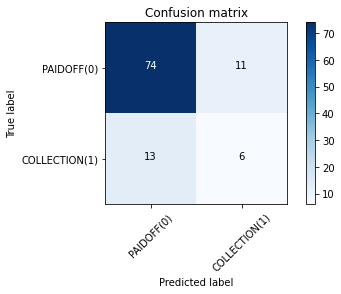

In [53]:
cnf_matrix = confusion_matrix(y_test, yhat_SVM, labels=[0,1])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat_SVM))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(0)', 'COLLECTION(1)'], normalize=False, title='Confusion matrix')

# Evaluation of model

In [54]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat_SVM, pos_label=0)

0.7551020408163265

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_SVM, average='weighted')

0.7641621943947523

# Final SVM model trained with all the data

In [56]:
svm_model_final = svm.SVC(kernel='rbf').fit(X,y)

# Logistic Regression


# Feature selection

In [57]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,0,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,1,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,2,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,2,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,2,0,4,1


In [58]:
feature_LR = df[['Principal', 'terms', 'age', 'education', 'Gender', 'dayofweek', 'weekend']]
X = np.asarray(feature_LR)

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -1.06, -0.42, -0.26, -1.21],
       [ 0.52,  0.92,  0.34, -0.01,  2.38, -0.26, -1.21],
       [ 0.52, -0.96, -0.65,  1.03, -0.42, -0.26, -1.21],
       [ 0.52,  0.92, -0.49,  1.03,  2.38,  0.12,  0.83],
       [ 0.52,  0.92, -0.32,  1.03, -0.42,  0.12,  0.83]])

In [59]:
y = np.asarray(df['loan_status'])
y[0:5]

array([0, 0, 0, 0, 0])

# Train, Test and Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=30)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (276, 7) (276,)
Test set: (70, 7) (70,)


# Training, test set prediction and log loss for different regularization strength's

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss



In [62]:
Cs = 100
acc_LL = np.zeros((Cs-1))
acc_JS = np.zeros((Cs-1))
acc_F1 = np.zeros((Cs-1))


#Train 20 models with k ranging from 1 to 20

for n in range(1,Cs):

    #Train Model and Predict
    LogR = LogisticRegression(C = n/100, solver='liblinear').fit(X_train,y_train)
    yhat_prob=LogR.predict_proba(X_test)
    yhat_LR = LogR.predict(X_test)
    
    acc_LL[n-1] = log_loss(y_test, yhat_prob)
    acc_JS[n-1] = jaccard_score(y_test, yhat_LR, pos_label=0)
    acc_F1[n-1] = f1_score(y_test, yhat_LR, average='weighted')
    
    
    




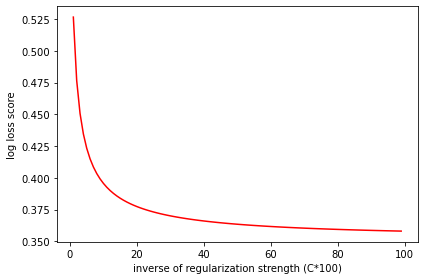

In [63]:
plt.plot(range(1,Cs),acc_LL, 'r')
plt.ylabel('log loss score')
plt.xlabel('inverse of regularization strength (C*100)')
plt.tight_layout()
plt.show()

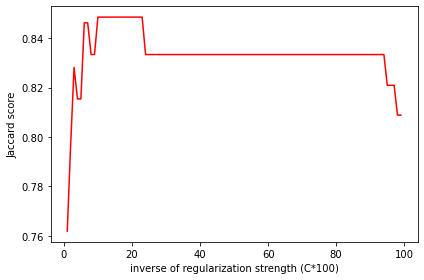

In [64]:
plt.plot(range(1,Cs),acc_JS, 'r')
plt.ylabel('Jaccard score')
plt.xlabel('inverse of regularization strength (C*100)')
plt.tight_layout()
plt.show()

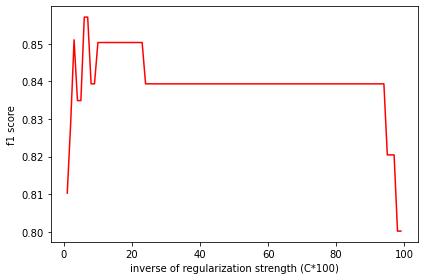

In [65]:
plt.plot(range(1,Cs),acc_F1, 'r')
plt.ylabel('f1 score')
plt.xlabel('inverse of regularization strength (C*100)')
plt.tight_layout()
plt.show()

# Best logistic regression model selection with regularization (C=0.9)

In [66]:
LogR_best = LogisticRegression(C=0.9, solver='liblinear').fit(X_train, y_train)
LogR_best

LogisticRegression(C=0.9, solver='liblinear')

In [67]:
yhat_LogR_best = LogR_best.predict(X_test)
yhat_LogR_best

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [68]:
yhat_LogR_best_prob = LogR_best.predict_proba(X_test)


In [69]:
jaccard_score(y_test, yhat_LogR_best, pos_label=0)

0.8333333333333334

In [70]:
f1_score(y_test, yhat_LogR_best, average='weighted')

0.8393711551606289

In [71]:

log_loss(y_test, yhat_LogR_best_prob)

0.35873230076185947

# Final Logistic Regression model trained with all data

In [72]:
LogR_final = LogisticRegression(C=0.9, solver='liblinear').fit(X, y)

# Model Evaluation using Test set


In [73]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [74]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-12-05 15:37:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-12-05 15:37:24 (47.5 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [94]:
test_df = pd.read_csv('loan_test.csv')
test_df.head(10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
5,37,37,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male
6,38,38,PAIDOFF,1000,15,9/11/2016,9/25/2016,24,college,male
7,48,48,PAIDOFF,1000,30,9/11/2016,10/10/2016,32,Bechalor,male
8,50,50,PAIDOFF,800,15,9/11/2016,9/25/2016,27,college,female
9,61,61,PAIDOFF,1000,15,9/11/2016,9/25/2016,37,college,male


# Features prep and selection for KNN and Decision tree models

In [95]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)

Feature_test['Bechalor'] = Feature_test['Bechalor'].astype('int')
Feature_test['High School or Below'] = Feature_test['High School or Below'].astype('int')
Feature_test['college'] = Feature_test['college'].astype('int')


In [96]:
X = Feature_test

X= preprocessing.StandardScaler().fit(X).transform(X)

X[:5]


array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.86]])

In [97]:
y = test_df['loan_status'].values

y[:5]

array([0, 0, 0, 0, 0])

# KNN model prediction and evaluation

In [98]:
yhat_KNN_final = neigh_final.predict(X)

In [101]:
print("KNN model jaccard_score: ", metrics.jaccard_score(y, yhat_KNN_final, pos_label=0))
print("KNN model f1_score: ", metrics.f1_score(y, yhat_KNN_final, average='weighted'))

KNN model jaccard_score:  0.6862745098039216
KNN model f1_score:  0.6736355806123249


# Decision Tree model prediction and evaluation

In [102]:
yhat_DT_final = loanTree_final.predict(X)

In [103]:
print("DecisionTree model jaccard_score: ", metrics.jaccard_score(y, yhat_DT_final, pos_label=0))
print("DecisionTree model f1_score: ", metrics.f1_score(y, yhat_DT_final, average='weighted'))

DecisionTree model jaccard_score:  0.7407407407407407
DecisionTree model f1_score:  0.6304176516942475


# Features prep and selection for SVM model 

In [104]:
test_df['education'].replace(to_replace=['High School or Below','Bechalor','college','Master or Above'], value=[0,1,2,4],inplace=True)


In [105]:
feature_SVM_test = test_df[['Principal', 'terms', 'education', 'age' , 'Gender' , 'dayofweek', 'weekend']]
X = np.asarray(feature_SVM_test)

X= preprocessing.StandardScaler().fit(X).transform(X)

In [106]:
y = np.asarray(test_df['loan_status'])

# SVM model prediction and evaluation

In [107]:
yhat_SVM_final = svm_model_final.predict(X)

In [108]:
print("SVM model jaccard_score: ", metrics.jaccard_score(y, yhat_SVM_final, pos_label=0))
print("SVM model f1_score: ", metrics.f1_score(y, yhat_SVM_final, average='weighted'))

SVM model jaccard_score:  0.7407407407407407
SVM model f1_score:  0.6304176516942475


# Features prep and selection for Logistic Regression model

In [109]:
feature_LR_test = test_df[['Principal', 'terms', 'age', 'education', 'Gender', 'dayofweek', 'weekend']]
X = np.asarray(feature_LR_test)

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.49,  0.93,  3.06, -0.14,  1.98, -0.29, -1.3 ],
       [-3.56, -1.7 ,  0.53,  2.69, -0.51,  0.1 ,  0.77],
       [ 0.49,  0.93,  1.88, -1.08,  1.98,  0.49,  0.77],
       [ 0.49,  0.93, -0.98,  0.8 , -0.51,  0.49,  0.77],
       [-0.67, -0.79, -0.48, -0.14, -0.51,  0.87,  0.77]])

In [110]:
y = np.asarray(test_df['loan_status'])
y[0:5]

array([0, 0, 0, 0, 0])

# Logistic regression model prediction and evaluation

In [111]:
yhat_LogR_final = LogR_final.predict(X)

In [112]:
yhat_LogR_final_prob = LogR_final.predict_proba(X)

In [113]:
print("Logistic model jaccard_score: ", metrics.jaccard_score(y, yhat_LogR_final, pos_label=0))
print("Logistic model f1_score: ", metrics.f1_score(y, yhat_LogR_final, average='weighted'))
print("Logistic Regression model log_loss: ", log_loss(y, yhat_LogR_final_prob))

Logistic model jaccard_score:  0.7547169811320755
Logistic model f1_score:  0.6717642373556352
Logistic Regression model log_loss:  0.4749794901426338


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                |0.6863   |0.6736    | NA      |
| Decision Tree      |0.7407   |0.6304    | NA      |
| SVM                |0.7407   |0.6304    | NA      |
| LogisticRegression |0.7547   |0.6718    |0.4750   |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
